# Import Dependencies

In [1]:
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
import numpy as np
import seaborn as sns
import keras


from tensorflow.keras.models import Sequential
from keras.utils import np_utils
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import BatchNormalization, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.utils import normalize, to_categorical
from keras.datasets import cifar10
from tensorflow.keras.preprocessing import image

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [3]:
print(np.unique(y_train))
print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [4]:
# Creating a list of all the class labels
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']

# Data Visualisation

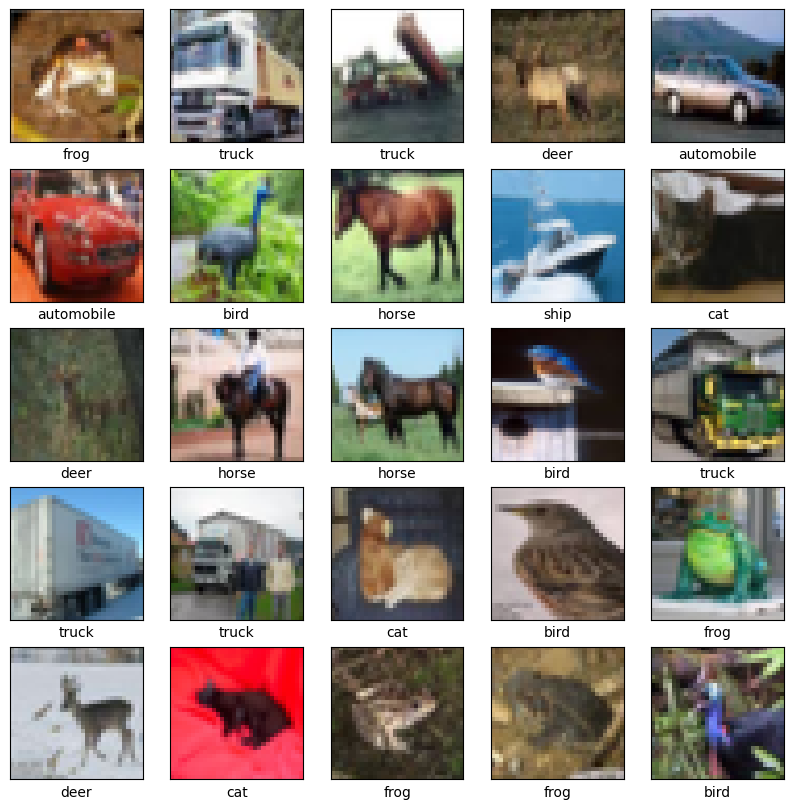

In [5]:
# Visualizing some of the images from the training dataset
plt.figure(figsize=[10,10])
for i in range (25):    # for first 25 images
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(X_train[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[y_train[i][0]])

### Since the imported data is already split into train and test there is no need for further split

# Data augmentation

In [6]:
X_train = normalize(X_train, axis = 1)
X_test = normalize(X_test, axis = 1)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [7]:
train_datagen = ImageDataGenerator(rotation_range=45,
                                  width_shift_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True)
train_datagen.fit(X_train)

train_generator = train_datagen.flow(
X_train,
y_train,
batch_size = 64)


# Building the CNN Model

In [8]:
model = Sequential()

model.add(Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32,32,3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

# Checking the model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                        

# Training the data

In [9]:
history = model.fit(X_train, y_train, batch_size=64, epochs=100,
                    validation_data=(X_test, y_test))

Epoch 1/100
782/782 [==============================] - 245s 306ms/step - loss: 1.7989 - accuracy: 0.3892 - val_loss: 2.1523 - val_accuracy: 0.3296
Epoch 2/100
782/782 [==============================] - 234s 300ms/step - loss: 1.2123 - accuracy: 0.5686 - val_loss: 2.1648 - val_accuracy: 0.3846
Epoch 3/100
782/782 [==============================] - 237s 303ms/step - loss: 1.0238 - accuracy: 0.6407 - val_loss: 0.9542 - val_accuracy: 0.6633
Epoch 4/100
782/782 [==============================] - 236s 302ms/step - loss: 0.9230 - accuracy: 0.6768 - val_loss: 0.8412 - val_accuracy: 0.7035
Epoch 5/100
782/782 [==============================] - 235s 301ms/step - loss: 0.8547 - accuracy: 0.7031 - val_loss: 0.9588 - val_accuracy: 0.6830
Epoch 6/100
782/782 [==============================] - 234s 300ms/step - loss: 0.8024 - accuracy: 0.7206 - val_loss: 0.7814 - val_accuracy: 0.7290
Epoch 7/100
782/782 [==============================] - 236s 302ms/step - loss: 0.7576 - accuracy: 0.7400 - val_loss: 0

# Training and validation accuracy and loss curves

Text(0.5, 1.0, 'Loss Curves')

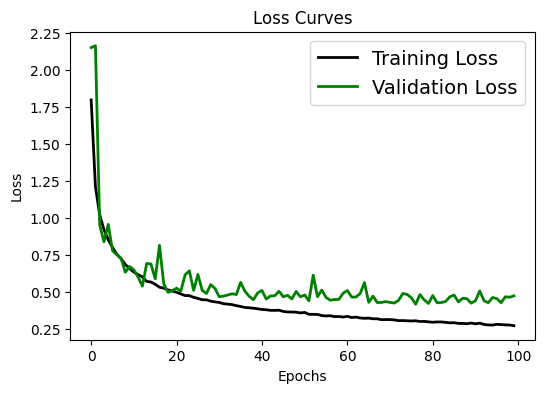

In [10]:
plt.figure(figsize=[6,4])
plt.plot(history.history['loss'], 'black', linewidth=2.0)
plt.plot(history.history['val_loss'], 'green', linewidth=2.0)
plt.legend(['Training Loss', 'Validation Loss'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Loss', fontsize=10)
plt.title('Loss Curves', fontsize=12)

Text(0.5, 1.0, 'Accuracy Curves')

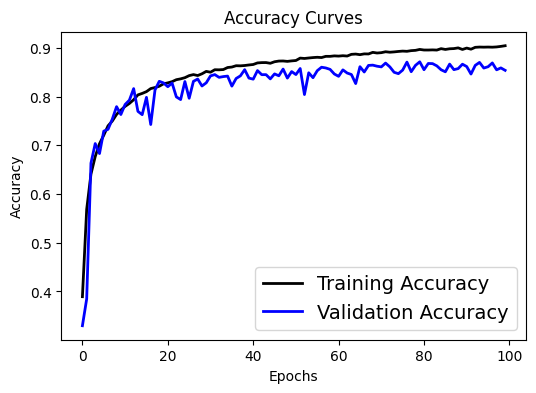

In [11]:
plt.figure(figsize=[6,4])
plt.plot(history.history['accuracy'], 'black', linewidth=2.0)
plt.plot(history.history['val_accuracy'], 'blue', linewidth=2.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.title('Accuracy Curves', fontsize=12)

# Test Performance on Test Data

313/313 [==============================] - 9s 29ms/step
[[1.29409318e-06 3.62144107e-07 1.01264695e-05 ... 5.03597789e-07
  6.60526848e-06 4.65222655e-07]
 [9.38004632e-07 4.70725298e-02 7.64515062e-10 ... 2.16676635e-10
  9.52926159e-01 3.84716657e-07]
 [1.78717200e-05 7.81096099e-03 2.81858263e-07 ... 1.83859879e-06
  9.91430938e-01 7.32352724e-04]
 ...
 [1.81971008e-10 5.43843581e-10 6.44000602e-06 ... 9.34266552e-07
  1.86765647e-09 1.85914326e-10]
 [6.90076486e-05 9.99209642e-01 4.52471113e-06 ... 7.84384611e-06
  3.23478616e-07 4.80205490e-04]
 [9.11528908e-10 9.33732758e-10 7.70098207e-09 ... 9.99991536e-01
  1.07664579e-10 4.35200903e-11]]
[3 8 8 ... 5 1 7]


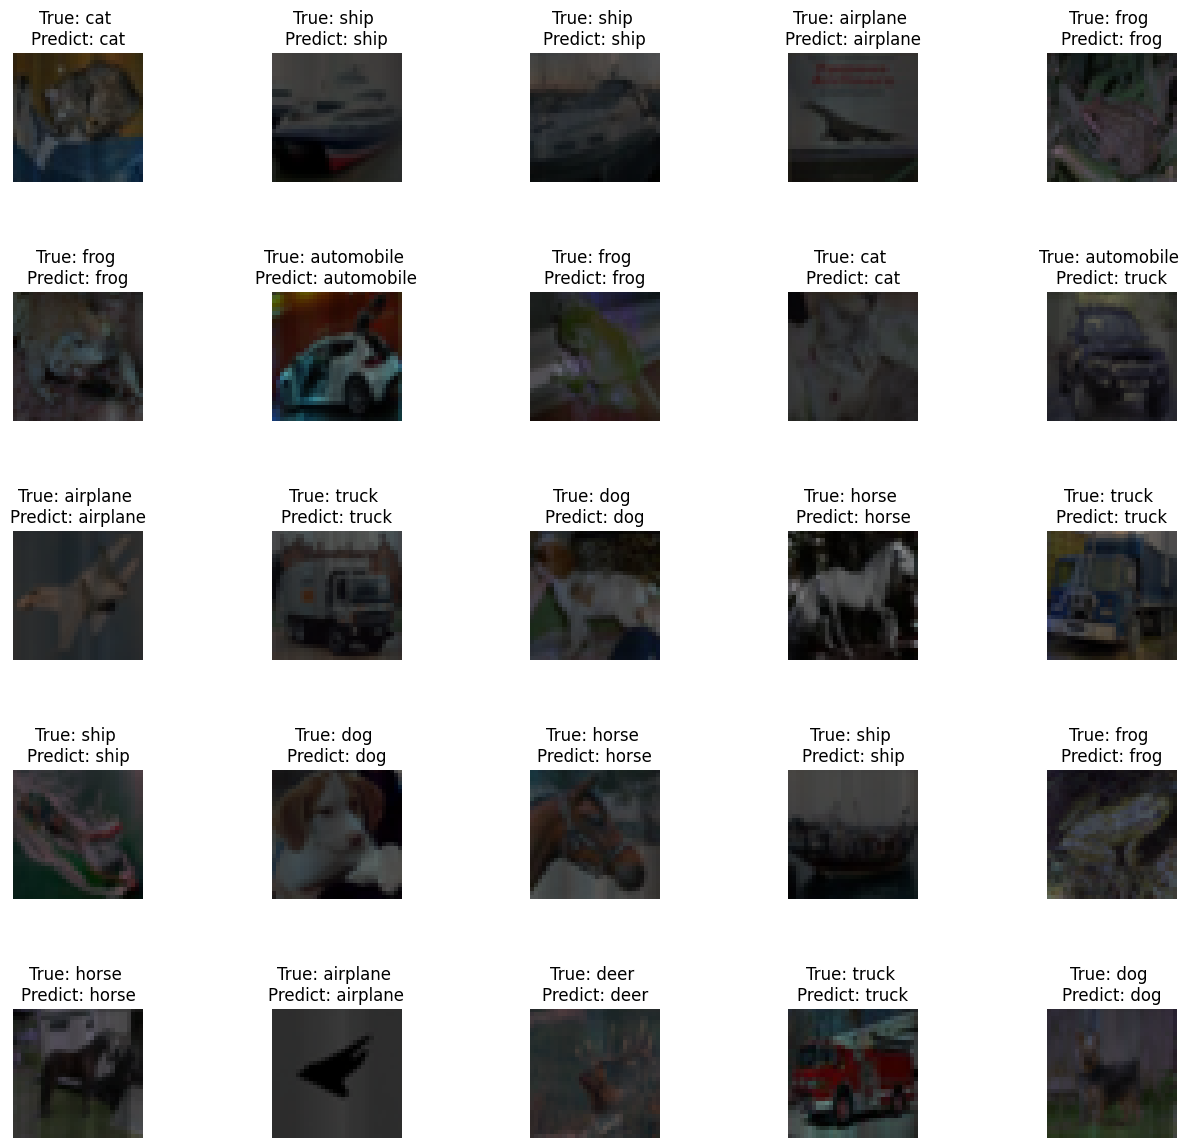

In [15]:
##predicting with test images

pred = model.predict(X_test)
print(pred)

# Converting the predictions into label index 
pred_classes = np.argmax(pred, axis=1)
print(pred_classes)

fig, axes = plt.subplots(5, 5, figsize=(15,15))
axes = axes.ravel()

for i in np.arange(0, 25):
    axes[i].imshow(X_test[i])
    axes[i].set_title("True: %s \nPredict: %s" % (class_names[np.argmax(y_test[i])], class_names[pred_classes[i]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)

In [17]:

# Load the image you want to make a prediction on
image_path = 'deer.jpeg'
img = image.load_img(image_path, target_size=(32, 32))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0  # Normalize the image

# Make predictions
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions[0])

# Display the predicted class
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']
predicted_label = class_names[predicted_class]
print("Predicted label:", predicted_label)


1/1 [==============================] - 0s 6ms/step
Predicted label: deer


In [18]:

# Load the image you want to make a prediction on
image_path = 'truck.jpeg'
img = image.load_img(image_path, target_size=(32, 32))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0  # Normalize the image

# Make predictions
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions[0])

# Display the predicted class
predicted_label = class_names[predicted_class]
print("Predicted label:", predicted_label)


1/1 [==============================] - 0s 22ms/step
Predicted label: truck
